In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip /content/drive/MyDrive/ML1/Skin_color_predictiion/Test/Labeled_Data.zip -d /content/drive/MyDrive/ML1/Skin_color_predictiion/Test/Labeled_Data


In [ ]:
# !git clone https://github.com/dchen236/FairFace.git
# cd FairFace/
# !python predict_bbox.py

Cloning into 'FairFace'...
remote: Enumerating objects: 220, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 220 (delta 4), reused 6 (delta 3), pack-reused 211
Receiving objects: 100% (220/220), 14.23 MiB | 17.99 MiB/s, done.
Resolving deltas: 100% (111/111), done.


In [ ]:
# !git clone https://github.com/Jeanvit/PySkinDetection.git
# cd PySkinDetection/
# !python skinDetector.py
# from src.skinDetector import SkinDetector
# detector = SkinDetector(image_path = "/content/drive/MyDrive/1.jpeg")
# detector.find_skin()
# detector.show_all_images()

fatal: destination path 'PySkinDetection' already exists and is not an empty directory.


#Skin Tone Detection

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout


In [ ]:
# Step 1: Load and preprocess your dataset
data_directory = '/content/drive/MyDrive/ML1/Skin_color_predictiion/Test/faces/faces_daatset'
color_categories = ['black', 'brown', 'white']

X = []  # List to store image data
y = []  # List to store color labels

for category in color_categories:
    category_path = os.path.join(data_directory, category)
    for image_file in os.listdir(category_path):
        image_path = os.path.join(category_path, image_file)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB format
        image = cv2.resize(image, (128, 128))  # Resize for consistency
        X.append(image)
        y.append(category)


In [ ]:
# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Data Augmentation (Optional)
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

In [ ]:
# Step 4: Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


In [ ]:
# Step 6: Compile the model with dropout
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    Dropout(0.5),  # Add dropout layer with a 50% dropout rate
    layers.Dense(len(color_categories), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 7: Model Training with early stopping
batch_size = 32
epochs = 100 # You can increase the number of epochs
train_generator = datagen.flow(np.array(X_train), y_train_encoded, batch_size=batch_size)

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(train_generator, epochs=epochs, validation_data=(np.array(X_test), y_test_encoded), callbacks=[early_stopping])


Epoch 1/100
9/9 [==============================] - 12s 1s/step - loss: 81.3500 - accuracy: 0.3697 - val_loss: 0.7995 - val_accuracy: 0.6806
Epoch 2/100
9/9 [==============================] - 12s 1s/step - loss: 1.0887 - accuracy: 0.6162 - val_loss: 0.6223 - val_accuracy: 0.6806
Epoch 3/100
9/9 [==============================] - 12s 1s/step - loss: 0.8142 - accuracy: 0.6620 - val_loss: 0.4536 - val_accuracy: 0.8611
Epoch 4/100
9/9 [==============================] - 12s 1s/step - loss: 0.6231 - accuracy: 0.7148 - val_loss: 0.2615 - val_accuracy: 0.9306
Epoch 5/100
9/9 [==============================] - 11s 1s/step - loss: 0.4642 - accuracy: 0.8099 - val_loss: 0.3165 - val_accuracy: 0.8750
Epoch 6/100
9/9 [==============================] - 12s 1s/step - loss: 0.4351 - accuracy: 0.8063 - val_loss: 0.3327 - val_accuracy: 0.9444
Epoch 7/100
9/9 [==============================] - 12s 1s/step - loss: 0.4264 - accuracy: 0.8380 - val_loss: 0.2401 - val_accuracy: 0.9583
Epoch 8/100
9/9 [=========

In [ ]:

# # Step 6: Compile the model
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

In [ ]:
# # Step 7: Model Training
# batch_size = 32
# epochs = 2
# train_generator = datagen.flow(np.array(X_train), y_train_encoded, batch_size=batch_size)
# history = model.fit(train_generator, epochs=epochs, validation_data=(np.array(X_test), y_test_encoded))


Epoch 1/2
9/9 [==============================] - 1s 143ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 2/2
9/9 [==============================] - 1s 123ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 4.3993e-05 - val_accuracy: 1.0000


In [ ]:
# Step 8: Evaluate the model
test_loss, test_acc = model.evaluate(np.array(X_test), y_test_encoded, verbose=2)
print(f"Test accuracy: {test_acc}")

3/3 - 1s - loss: 0.0115 - accuracy: 1.0000 - 592ms/epoch - 197ms/step
Test accuracy: 1.0


In [ ]:
# Save the trained model in HDF5 format
model.save('/content/drive/MyDrive/ML1/Skin_color_predictiion/Test/faces/model/my_model.h5')


In [ ]:
model.save('my_model.keras')

In [ ]:
# Step 9: Make predictions for a new face (Replace 'new_face_image' with the path to your image)
new_face_image = cv2.imread('/content/drive/MyDrive/ML1/Skin_color_predictiion/Test/faces/test/test_1/PXL_20220922_163025599.jpg')
new_face_image = cv2.cvtColor(new_face_image, cv2.COLOR_BGR2RGB)
new_face_image = cv2.resize(new_face_image, (128, 128))
new_face_image = np.expand_dims(new_face_image, axis=0)
predicted_color = model.predict(new_face_image)
predicted_category = color_categories[np.argmax(predicted_color)]
print(f"Predicted color category for the new face: {predicted_category}")

1/1 [==============================] - 0s 166ms/step
Predicted color category for the new face: white


1/1 [==============================] - 0s 97ms/step


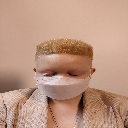

Predicted color category for PXL_20220922_182823421.jpg: white
1/1 [==============================] - 0s 31ms/step


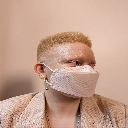

Predicted color category for PXL_20220922_182843801.jpg: white
1/1 [==============================] - 0s 37ms/step


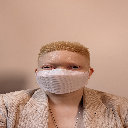

Predicted color category for PXL_20220922_182827542.jpg: white
1/1 [==============================] - 0s 30ms/step


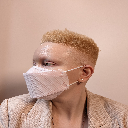

Predicted color category for PXL_20220922_182846104.jpg: white
1/1 [==============================] - 0s 35ms/step


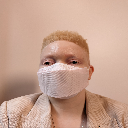

Predicted color category for PXL_20220922_182838794.jpg: white
1/1 [==============================] - 0s 34ms/step


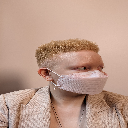

Predicted color category for PXL_20220922_182820039.jpg: white
1/1 [==============================] - 0s 35ms/step


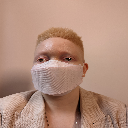

Predicted color category for PXL_20220922_182836446.jpg: white
1/1 [==============================] - 0s 33ms/step


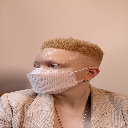

Predicted color category for PXL_20220922_182818299.jpg: white
1/1 [==============================] - 0s 36ms/step


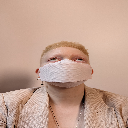

Predicted color category for PXL_20220922_182821960.jpg: white
1/1 [==============================] - 0s 32ms/step


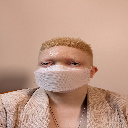

Predicted color category for PXL_20220922_182816244.jpg: white
1/1 [==============================] - 0s 32ms/step


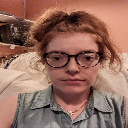

Predicted color category for PXL_20220922_163150248.jpg: brown
1/1 [==============================] - 0s 33ms/step


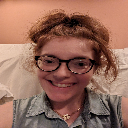

Predicted color category for PXL_20220922_163212621.jpg: brown
1/1 [==============================] - 0s 36ms/step


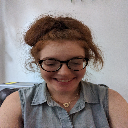

Predicted color category for PXL_20220922_163041327.jpg: white
1/1 [==============================] - 0s 35ms/step


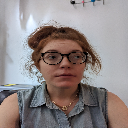

Predicted color category for PXL_20220922_163049541.jpg: white
1/1 [==============================] - 0s 31ms/step


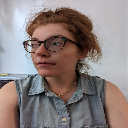

Predicted color category for PXL_20220922_163027663.jpg: white
1/1 [==============================] - 0s 28ms/step


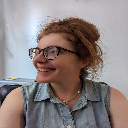

Predicted color category for PXL_20220922_163037538.jpg: white
1/1 [==============================] - 0s 30ms/step


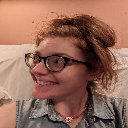

Predicted color category for PXL_20220922_163215993.jpg: brown
1/1 [==============================] - 0s 33ms/step


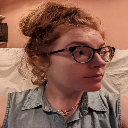

Predicted color category for PXL_20220922_163156369.jpg: brown
1/1 [==============================] - 0s 37ms/step


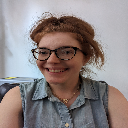

Predicted color category for PXL_20220922_163036224.jpg: white
1/1 [==============================] - 0s 30ms/step


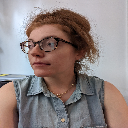

Predicted color category for PXL_20220922_163029140.jpg: white
1/1 [==============================] - 0s 34ms/step


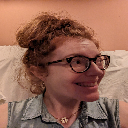

Predicted color category for PXL_20220922_163218116.jpg: brown
1/1 [==============================] - 0s 30ms/step


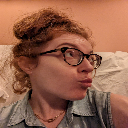

Predicted color category for PXL_20220922_163242384.jpg: brown
1/1 [==============================] - 0s 29ms/step


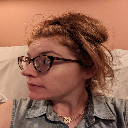

Predicted color category for PXL_20220922_163227429.jpg: brown
1/1 [==============================] - 0s 30ms/step


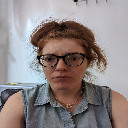

Predicted color category for PXL_20220922_163045525.jpg: white
1/1 [==============================] - 0s 32ms/step


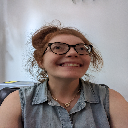

Predicted color category for PXL_20220922_163040135.jpg: white
1/1 [==============================] - 0s 35ms/step


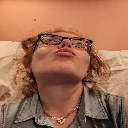

Predicted color category for PXL_20220922_163243828.jpg: brown
1/1 [==============================] - 0s 36ms/step


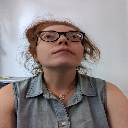

Predicted color category for PXL_20220922_163030548.jpg: white
1/1 [==============================] - 0s 31ms/step


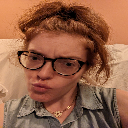

Predicted color category for PXL_20220922_163238367.jpg: brown
1/1 [==============================] - 0s 46ms/step


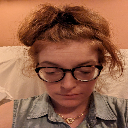

Predicted color category for PXL_20220922_163233149.jpg: brown
1/1 [==============================] - 0s 50ms/step


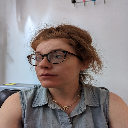

Predicted color category for PXL_20220922_163048143.jpg: white
1/1 [==============================] - 0s 46ms/step


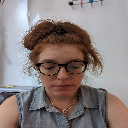

Predicted color category for PXL_20220922_163052549.jpg: white
1/1 [==============================] - 0s 52ms/step


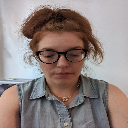

Predicted color category for PXL_20220922_163031782.jpg: white
1/1 [==============================] - 0s 47ms/step


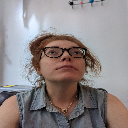

Predicted color category for PXL_20220922_163051167.jpg: white
1/1 [==============================] - 0s 47ms/step


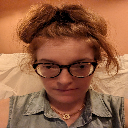

Predicted color category for PXL_20220922_163205440.jpg: brown
1/1 [==============================] - 0s 33ms/step


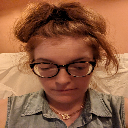

Predicted color category for PXL_20220922_163207738.jpg: brown
1/1 [==============================] - 0s 34ms/step


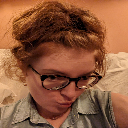

Predicted color category for PXL_20220922_163246206.jpg: brown
1/1 [==============================] - 0s 34ms/step


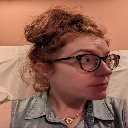

Predicted color category for PXL_20220922_163229525.jpg: brown
1/1 [==============================] - 0s 33ms/step


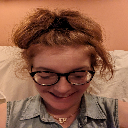

Predicted color category for PXL_20220922_163221806.jpg: brown
1/1 [==============================] - 0s 46ms/step


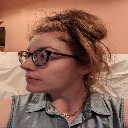

Predicted color category for PXL_20220922_163153639.jpg: brown
1/1 [==============================] - 0s 38ms/step


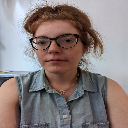

Predicted color category for PXL_20220922_163025599.jpg: white
1/1 [==============================] - 0s 30ms/step


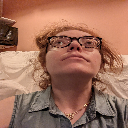

Predicted color category for PXL_20220922_163158577.jpg: brown
1/1 [==============================] - 0s 32ms/step


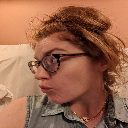

Predicted color category for PXL_20220922_163240509.jpg: brown
1/1 [==============================] - 0s 35ms/step


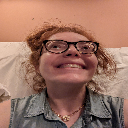

Predicted color category for PXL_20220922_163219950.jpg: brown
1/1 [==============================] - 0s 31ms/step


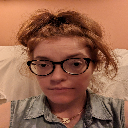

Predicted color category for PXL_20220922_163224863.jpg: brown
1/1 [==============================] - 0s 36ms/step


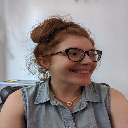

Predicted color category for PXL_20220922_163038839.jpg: white
1/1 [==============================] - 0s 33ms/step


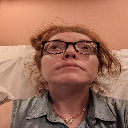

Predicted color category for PXL_20220922_163231266.jpg: brown


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from google.colab.patches import cv2_imshow  # Import cv2_imshow from google.colab.patches

# Step 9: Load the trained model
model = load_model('/content/drive/MyDrive/ML1/Skin_color_predictiion/Test/faces/model/my_model.h5')  # Load your trained model here

# Define your color categories
color_categories = ['white', 'brown', 'blsck']  # Replace with your actual color categories

# Directory containing testing images
directory_path = '/content/drive/MyDrive/ML1/Skin_color_predictiion/Test/faces/test/test_1/'

# List all files in the directory
import os

file_list = os.listdir(directory_path)

for filename in file_list:
    # Construct the full file path
    file_path = os.path.join(directory_path, filename)

    # Read and preprocess the image
    new_face_image = cv2.imread(file_path)
    #new_face_image = cv2.cvtColor(new_face_image, cv2.COLOR_BGR2RGB)
    new_face_image = cv2.resize(new_face_image, (128, 128))
    new_face_image = np.expand_dims(new_face_image, axis=0)

    # Make a prediction
    predicted_color = model.predict(new_face_image)
    predicted_category = color_categories[np.argmax(predicted_color)]

    # Display the image and its prediction using cv2_imshow
    cv2_imshow(new_face_image[0])  # Display the image
    print(f"Predicted color category for {filename}: {predicted_category}")


#Skin Mask

<ipython-input-3-e0eca65e2309>:20: RuntimeWarning: overflow encountered in ubyte_scalars
  (G - B >= 10 and G - B <= 65) and \
<ipython-input-3-e0eca65e2309>:21: RuntimeWarning: overflow encountered in ubyte_scalars
  (R - G >= 10 and R - G <= 85):


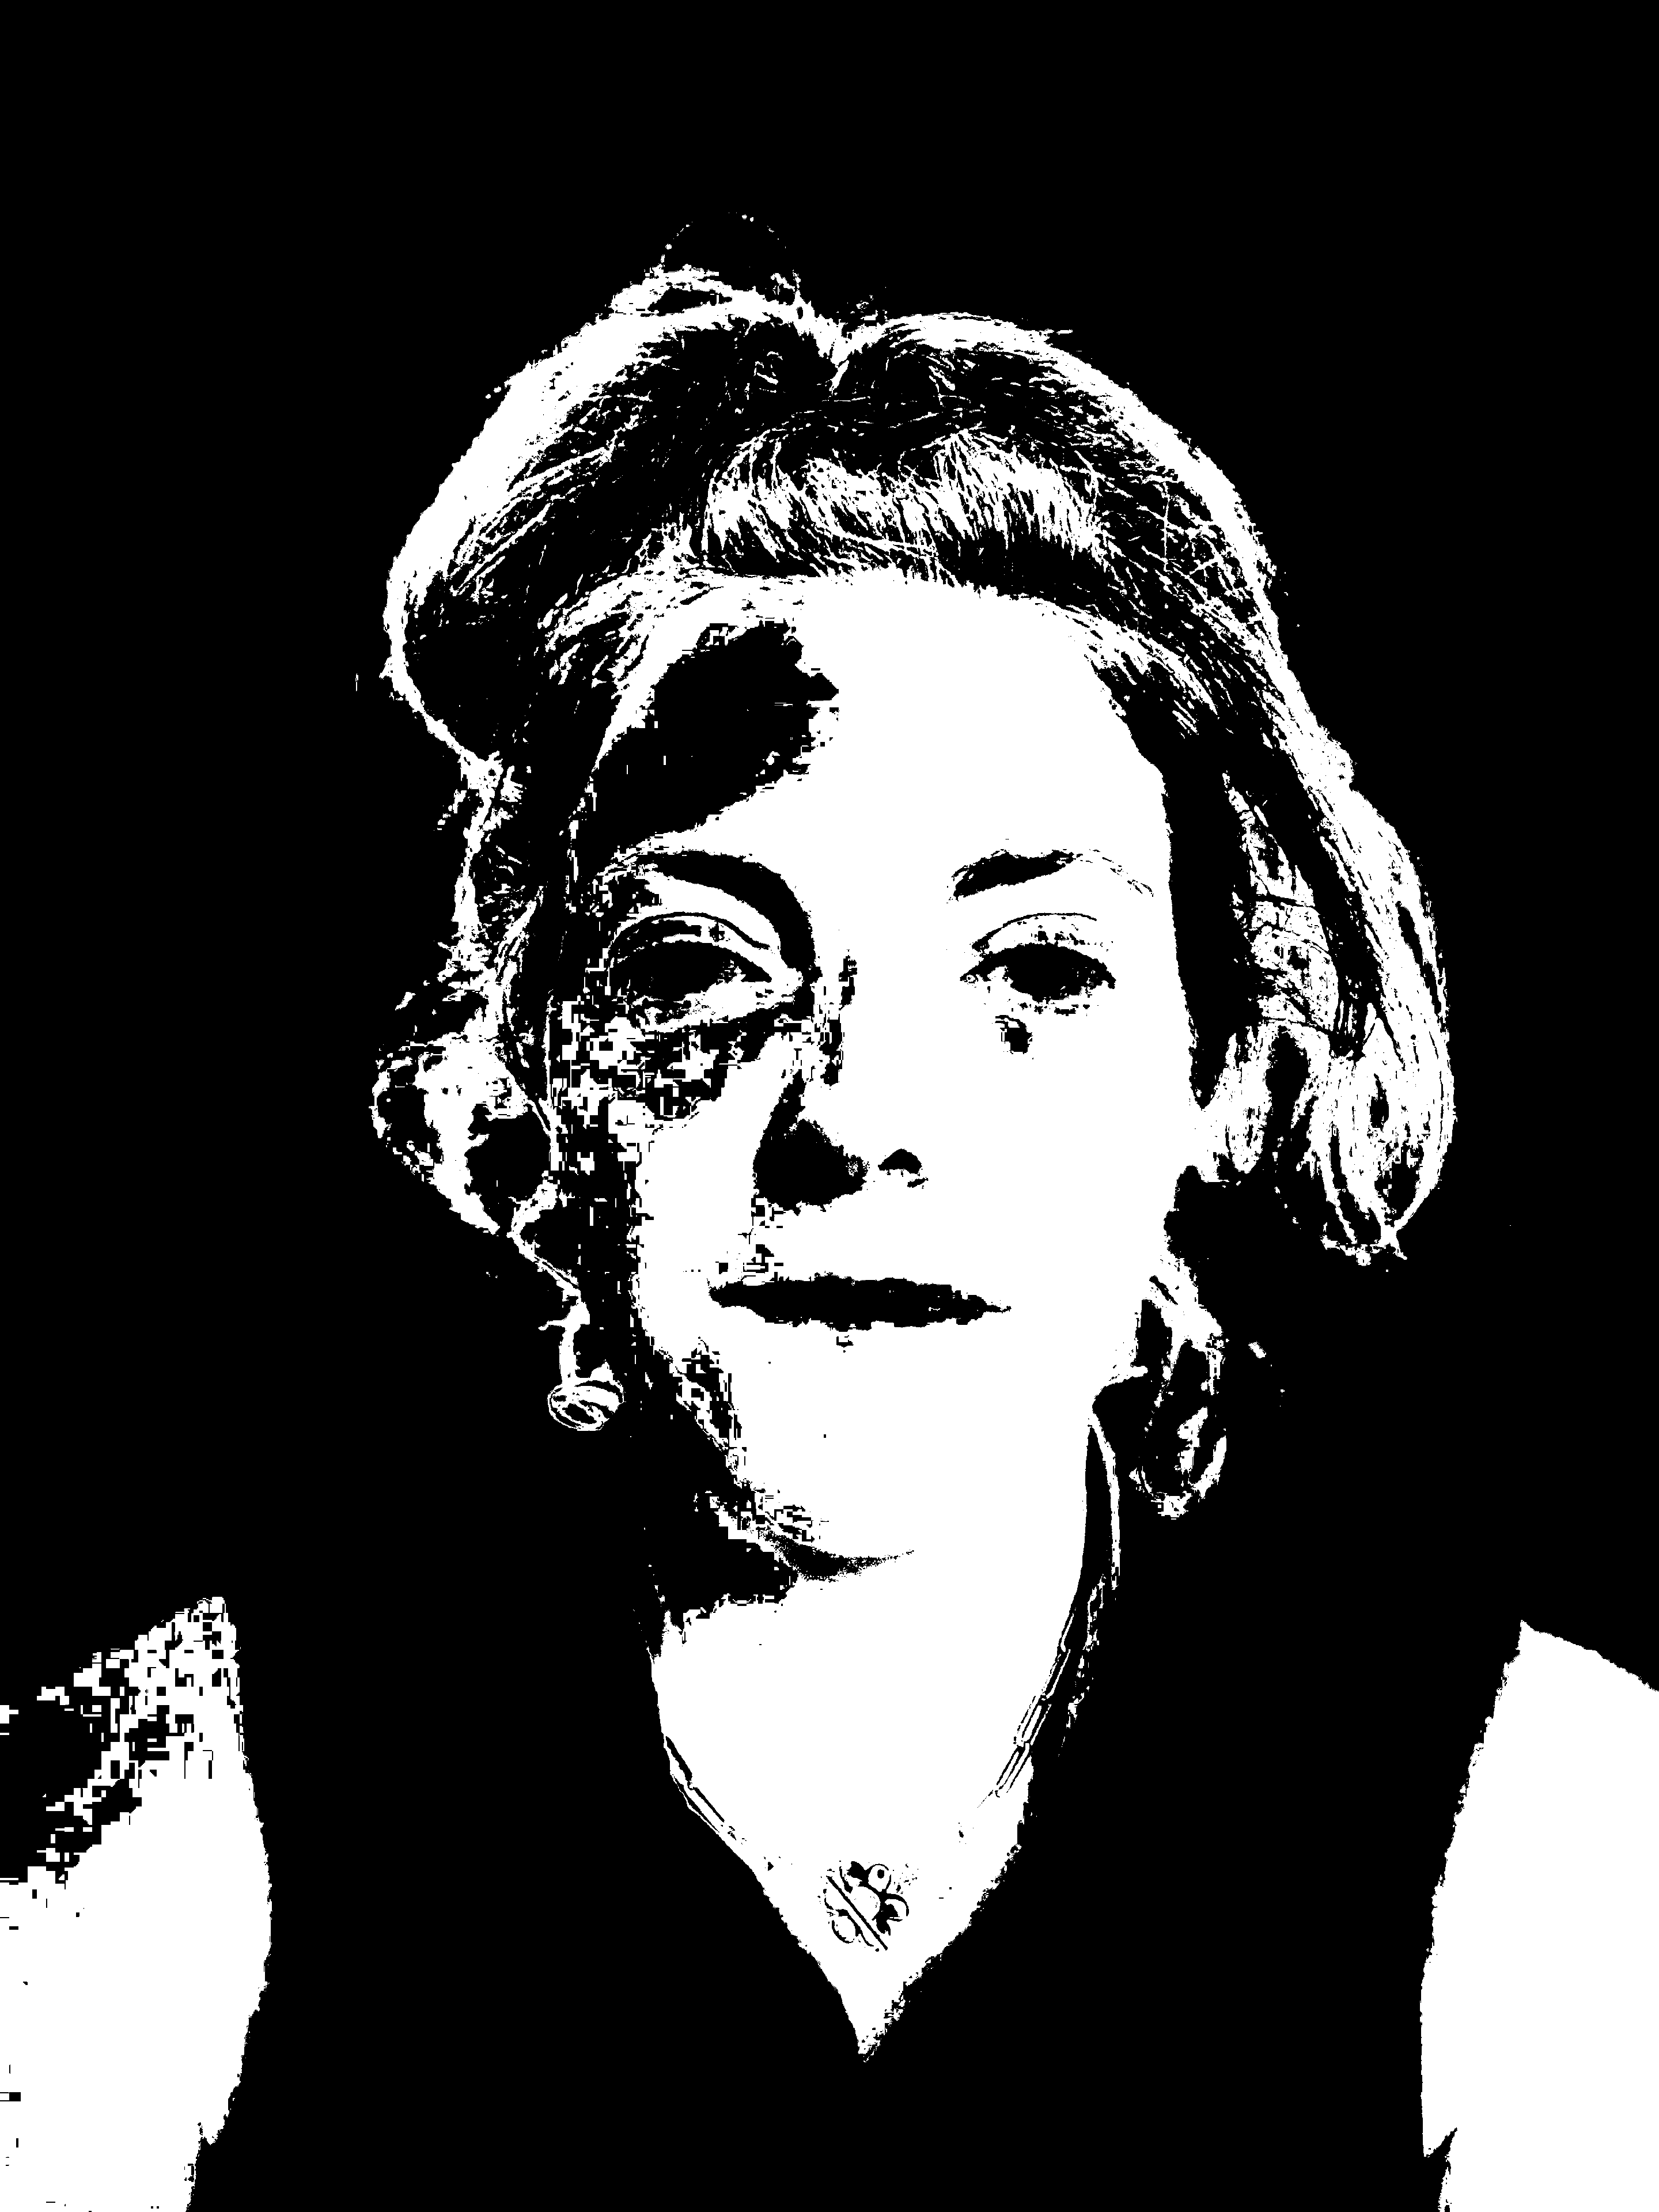

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Import cv2_imshow from google.colab.patches


# Load the image
image = cv2.imread('/content/drive/MyDrive/ML1/Skin_color_predictiion/Test/faces/faces_daatset/white/PXL_20220922_162746982.jpg')

# Define a function for skin tone color detection
def detect_skin_color(image):
    # Create a mask for the skin tone color
    skin_mask = np.zeros(image.shape[:2], dtype=np.uint8)

    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            B, G, R = image[y, x]

            # Apply your skin tone color detection criteria
            if (B >= 50 and B <= 215) and \
               (G - B >= 10 and G - B <= 65) and \
               (R - G >= 10 and R - G <= 85):
                skin_mask[y, x] = 255  # Set the pixel as skin color

    return skin_mask

# Call the skin tone color detection function
skin_mask = detect_skin_color(image)

# Display the skin mask (white pixels represent skin tone color)
cv2_imshow(skin_mask)
cv2.waitKey(0)
cv2.destroyAllWindows()


<ipython-input-4-b190c413dcdb>:20: RuntimeWarning: overflow encountered in ushort_scalars
  (G - B >= 10 and G - B <= 65) and \
<ipython-input-4-b190c413dcdb>:21: RuntimeWarning: overflow encountered in ushort_scalars
  (R - G >= 10 and R - G <= 85):


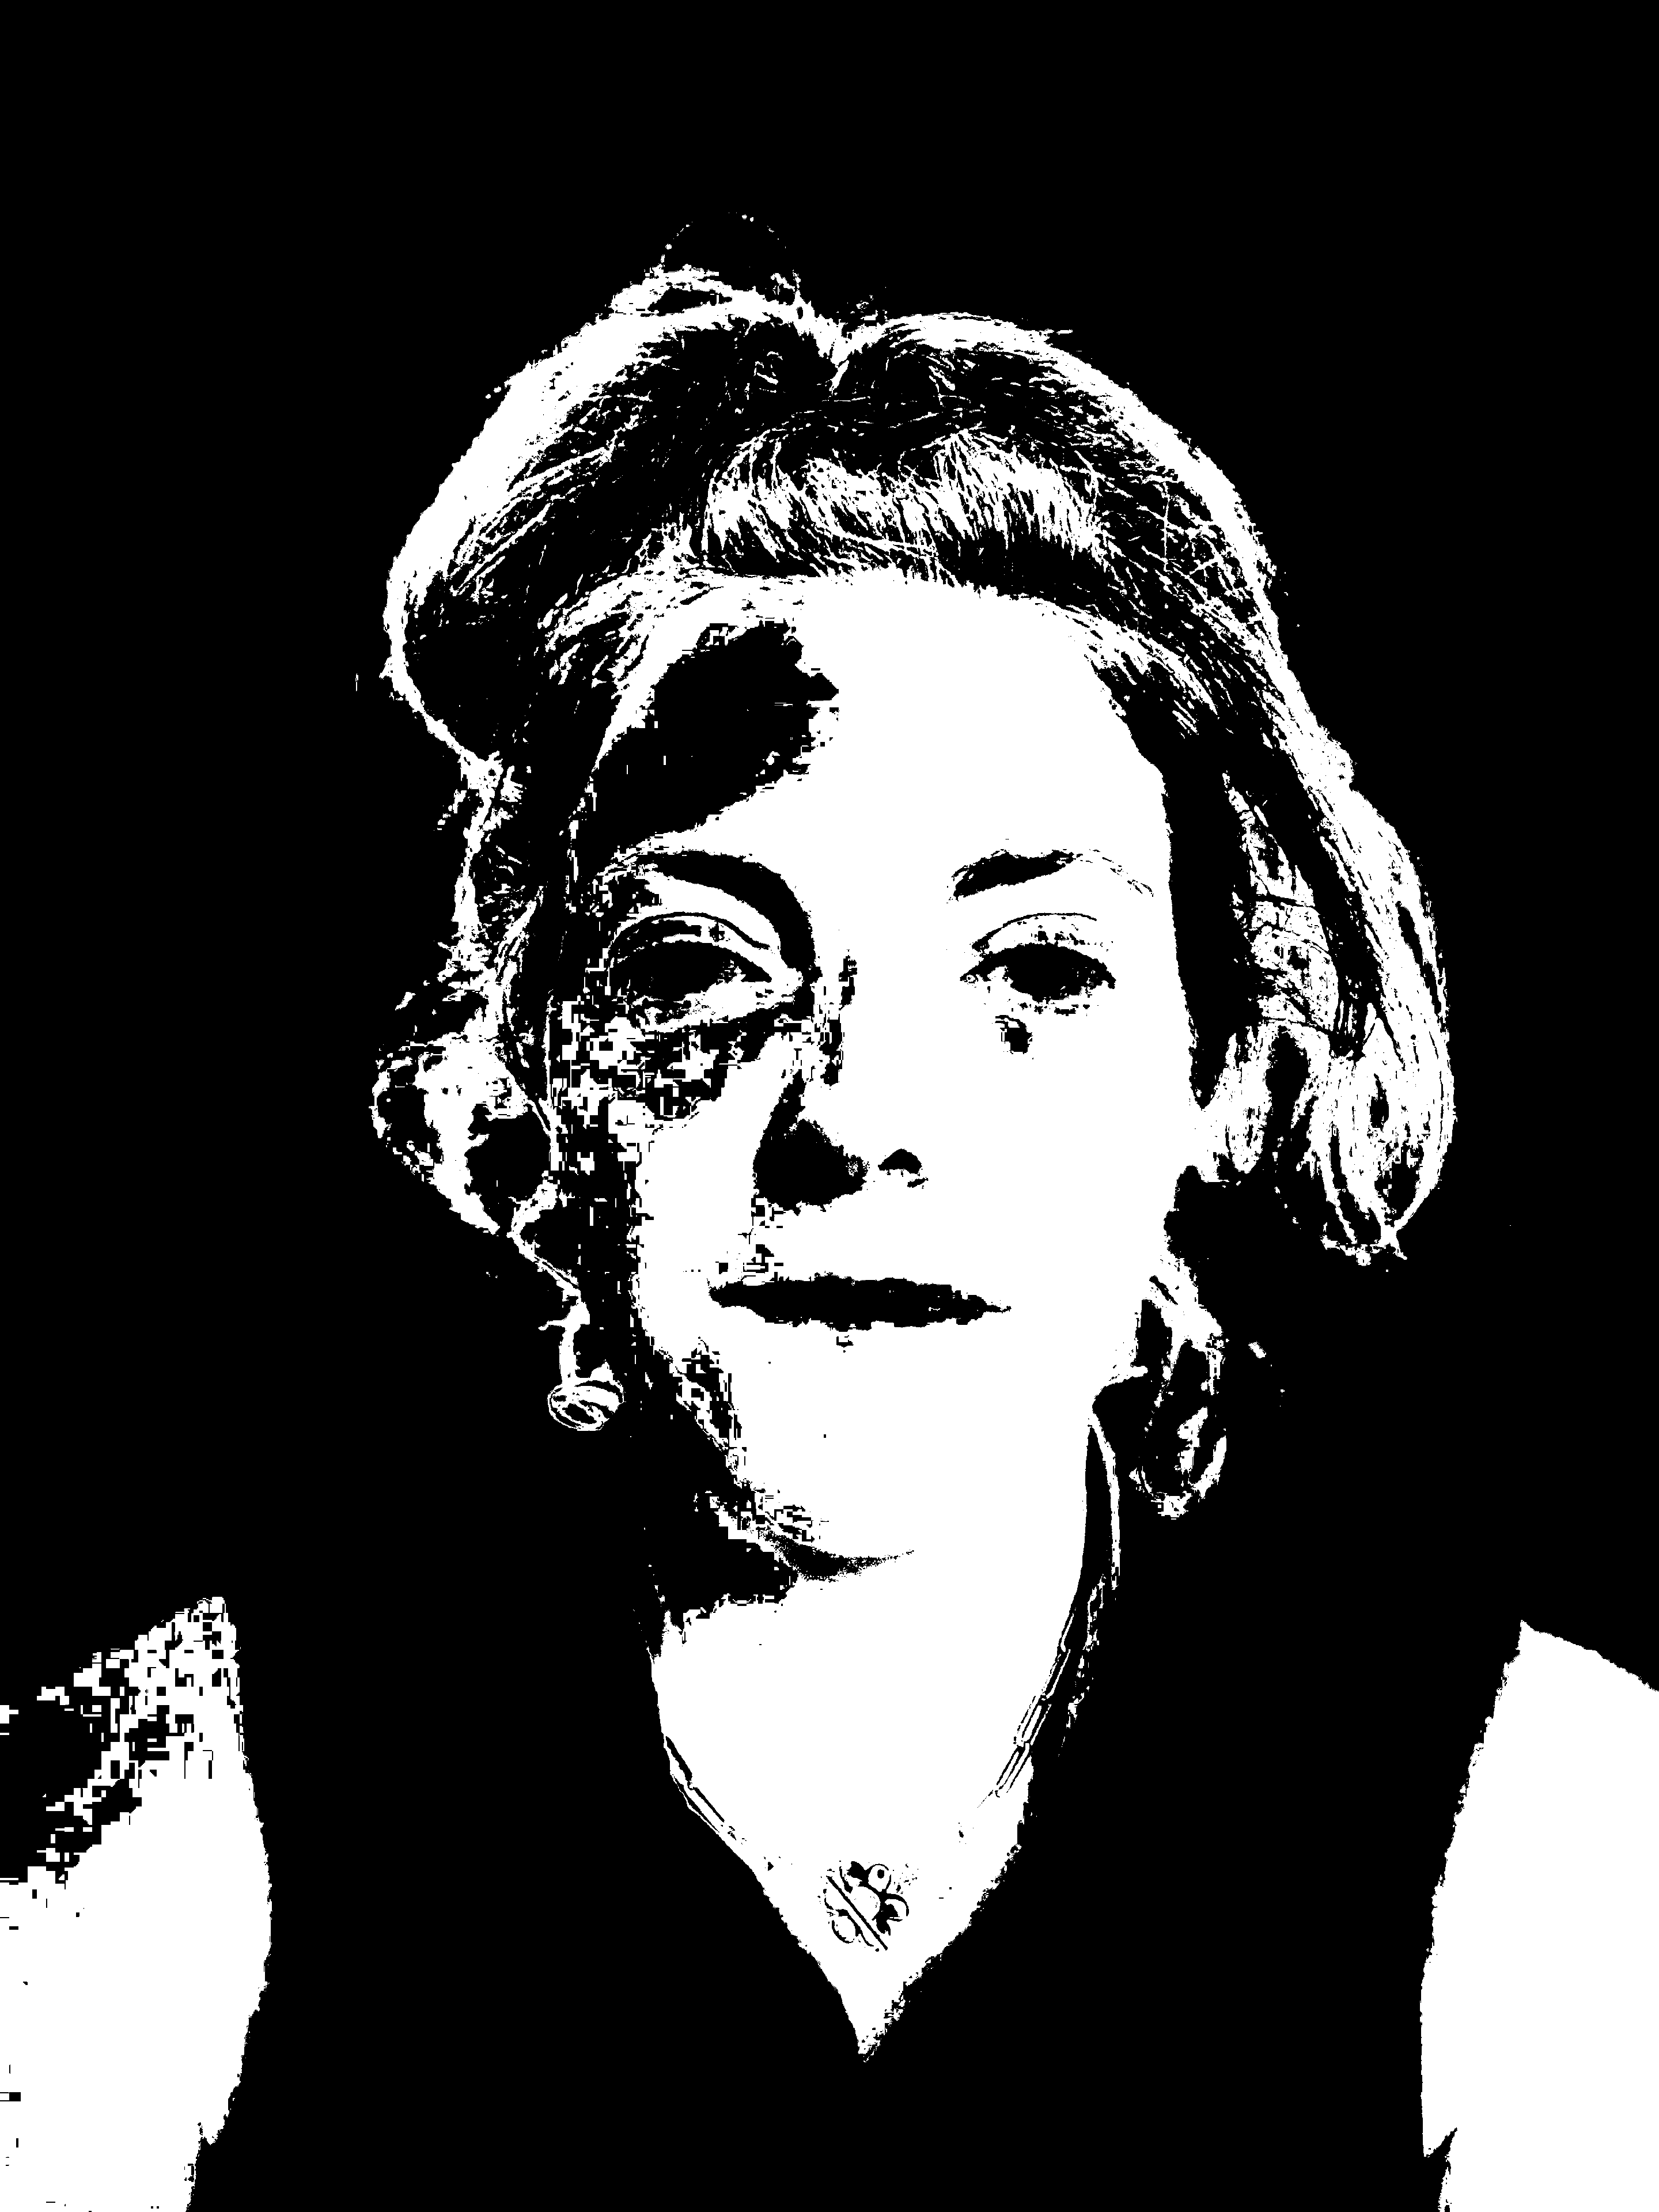

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Import cv2_imshow from google.colab.patches

# Load the image
image = cv2.imread('/content/drive/MyDrive/ML1/Skin_color_predictiion/Test/faces/faces_daatset/white/PXL_20220922_162746982.jpg')
def detect_skin_color(image):
    # Create a mask for the skin tone color
    skin_mask = np.zeros(image.shape[:2], dtype=np.uint8)

    for y in range(image.shape[0]):
        for x in range(image.shape[1]):
            B, G, R = image[y, x]

            # Convert the pixel values to np.uint16 before performing operations
            B, G, R = np.uint16(B), np.uint16(G), np.uint16(R)

            # Apply your skin tone color detection criteria
            if (B >= 50 and B <= 215) and \
               (G - B >= 10 and G - B <= 65) and \
               (R - G >= 10 and R - G <= 85):
                skin_mask[y, x] = 255  # Set the pixel as skin color

    return skin_mask
skin_mask = detect_skin_color(image)

# Display the skin mask (white pixels represent skin tone color)
cv2_imshow(skin_mask)
cv2.waitKey(0)
cv2.destroyAllWindows()


#Classes 9

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout


In [ ]:

# Specify the path to the folder containing the labeled data
data_dir = "/content/drive/MyDrive/ML1/Skin_color_predictiion/Test/Labeled_Data/Labeled_Data"

# Define a list to store image data and labels
X = []  # Image data
y = []  # Labels

# Loop through each subfolder (class) in the labeled data folder
for class_folder in os.listdir(data_dir):
    if os.path.isdir(os.path.join(data_dir, class_folder)):
        class_label = int(class_folder.split('_')[1])
        class_path = os.path.join(data_dir, class_folder)

        # Loop through images in the class folder
        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)

            # Load and preprocess each image
            img = cv2.imread(image_path)
            img = cv2.resize(img, (224, 224))  # Resize to a consistent size
            img = img / 255.0  # Normalize pixel values to [0, 1]

            X.append(img)
            y.append(class_label)

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
